# Expectation Based Scan Statistic on Ealing

In [1]:
from region import *
from scan import *
from likelihood import *
from results import *
from timeseries import *
import pandas as pd

## Time Series Analysis

Output from TSA. For convenience, we just import a csv file with processing already complete. Roughly 30 mins work.

In [2]:
forecast_df = pd.read_csv("../ealing-april-june-forecast-LTSM-1.csv")
forecast_df.drop(["Unnamed: 0", "C/B"], axis=1, inplace=True)

## The Scan

Data Checks as a first step - baselines non-negative and dates to datetime. TODO add this function.

In [3]:
forecast_df = convert_dates(forecast_df)
forecast_df['baseline'] = forecast_df['baseline'].apply(lambda x : np.max([0, x]))
# How many to drop? Print how many logging important function.
forecast_df.dropna(inplace=True)
forecast_df

,detector_id,lon,lat,measurement_start_utc,measurement_end_utc,baseline,count,hour_from_start
0,N28/140h1,-0.278212,51.539003,2020-06-04 00:00:00,2020-06-04 01:00:00,23.822554,16.0,0.0
1,N28/140h1,-0.278212,51.539003,2020-06-04 01:00:00,2020-06-04 02:00:00,26.402401,28.0,1.0
2,N28/140h1,-0.278212,51.539003,2020-06-04 02:00:00,2020-06-04 03:00:00,33.188900,14.0,2.0
3,N28/140h1,-0.278212,51.539003,2020-06-04 03:00:00,2020-06-04 04:00:00,29.973198,27.0,3.0
4,N28/140h1,-0.278212,51.539003,2020-06-04 04:00:00,2020-06-04 05:00:00,54.348274,70.0,4.0
...,...,...,...,...,...,...,...,...
14659,N24/081x1,-0.322762,51.457745,2020-06-04 19:00:00,2020-06-04 20:00:00,187.989140,190.0,19.0
14660,N24/081x1,-0.322762,51.457745,2020-06-04 20:00:00,2020-06-04 21:00:00,137.350680,118.0,20.0
14661,N24/081x1,-0.322762,51.457745,2020-06-04 21:00:00,2020-06-04 22:00:00,97.389130,78.0,21.0
14662,N24/081x1,-0.322762,51.457745,2020-06-04 22:00:00,2020-06-04 23:00:00,74.707466,51.0,22.0


`infer_global_region()`

In [4]:
print(infer_global_region(forecast_df))

(-0.349749335498348, -0.25041616657384697) x (51.450833237060785, 51.5408981075881) x (2020-06-04 00:00:00, 2020-06-05 00:00:00)


### `plot_global_region()`

First choose a date to look at activity.

In [5]:
test_date = forecast_df["measurement_end_utc"].iloc[0]

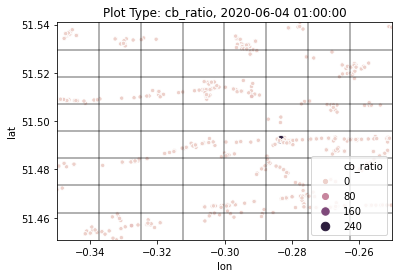

In [8]:
plot_global_region(forecast_df, test_date, overlay_grid=True, grid_partition=8, plot_type='cb_ratio', add_legend=True)

Then, we can run the model ...

### `EBP()`

In [9]:
res_df = EBP(forecast_df, 8)

100.00% complete.
16224 space-time regions searched in 44.47 seconds


In [10]:
res_df

,x_min,x_max,y_min,y_max,t_min,t_max,B,C,likelihood_score,p_value
15893,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 06:00:00,0.016349,0.027149,1.002974,NaN
15892,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 05:00:00,0.009781,0.017857,1.002677,NaN
15891,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 04:00:00,0.007159,0.014103,1.002622,NaN
15898,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 11:00:00,0.070393,0.089597,1.002412,NaN
15911,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-05 00:00:00,0.186017,0.216271,1.002340,NaN
...,...,...,...,...,...,...,...,...,...,...
6268,-0.324916,-0.287666,51.450833,51.473349,2020-06-04,2020-06-04 05:00:00,0.024746,0.023080,1.000000,NaN
6269,-0.324916,-0.287666,51.450833,51.473349,2020-06-04,2020-06-04 06:00:00,0.038790,0.036748,1.000000,NaN
6270,-0.324916,-0.287666,51.450833,51.473349,2020-06-04,2020-06-04 07:00:00,0.060192,0.058408,1.000000,NaN
6271,-0.324916,-0.287666,51.450833,51.473349,2020-06-04,2020-06-04 08:00:00,0.081009,0.080421,1.000000,NaN


Once we have `res_df`, we can do many things...

### `plot_region_by_rank()` - See which regions of space are getting the highest F(S) scores

Swicth between `plot_types`

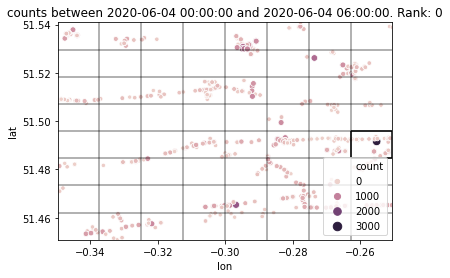

In [13]:
plot_region_by_rank(0, res_df, forecast_df, plot_type='count', add_legend=True)

Now suppose I was interested in this highest ranked region and want to look at its time series... Switch the plot type between "count", "baseline" and "cb_ratio".

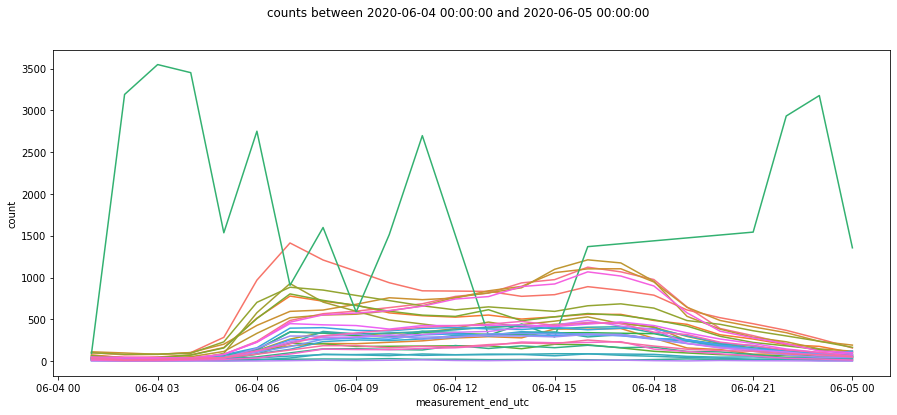

In [14]:
# First create a region object
region = make_region_from_res(res_df, rank=0, whole_prediction_period=True)

plot_region_time_series(region, forecast_df, plot_type="count", add_legend=False)

This highest scoring region contains ~20 detectors  - this is what they do over the whole period.

#### Average Likelihood Visualisation

For each of our `grid_partition` x `grid_parition` cells, we can calculate it's average likelihood accumulated form the overlapping search rectangles. 

In [15]:
# First call this function to get all plot information
scores, x, y, t, av_l_max = average_likelihood(res_df)

Now, we can plot using `visualise_results()`

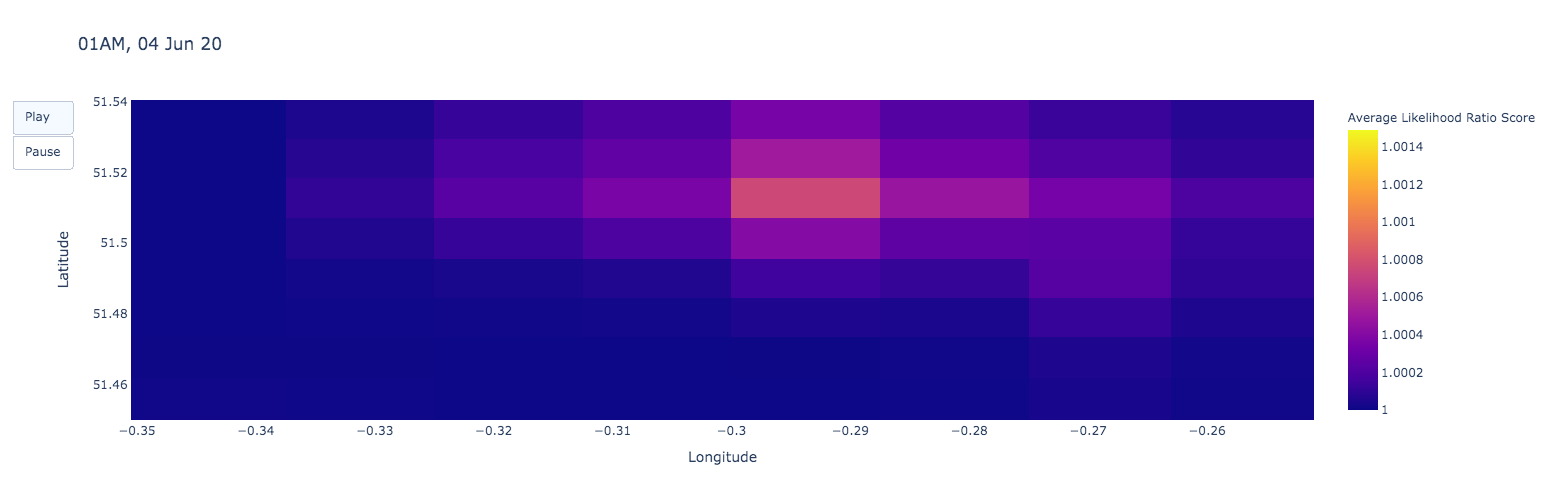

In [18]:
visualise_results(scores, x, y, t, av_l_max, smooth=False)

## Randomisation Testing

Now we have the result, how significant are they?

`randomisation_test()`

In [20]:
sig_df, f_scores = randomisation_test(forecast_df, res_df, n_sims=5)

Found a grid partition = 8
Searching over the region spanning 24 hours

Beginning Simulation
Performing simulation 5 of 5.
Time Elapsed: 402.278065402 seconds


Let's see how our scores from `res_df` compare with randomly generated ones. The `sig_df` dataframe has now populated the `p_value` columns of `res_df`.

In [21]:
sig_df

,x_min,x_max,y_min,y_max,t_min,t_max,B,C,likelihood_score,p_value
15893,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 06:00:00,0.016349,0.027149,1.002974,0.000000
15892,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 05:00:00,0.009781,0.017857,1.002677,0.000000
15891,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 04:00:00,0.007159,0.014103,1.002622,0.000000
15898,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 11:00:00,0.070393,0.089597,1.002412,0.000000
15911,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-05 00:00:00,0.186017,0.216271,1.002340,0.000000
...,...,...,...,...,...,...,...,...,...,...
6268,-0.324916,-0.287666,51.450833,51.473349,2020-06-04,2020-06-04 05:00:00,0.024746,0.023080,1.000000,0.833333
6269,-0.324916,-0.287666,51.450833,51.473349,2020-06-04,2020-06-04 06:00:00,0.038790,0.036748,1.000000,0.833333
6270,-0.324916,-0.287666,51.450833,51.473349,2020-06-04,2020-06-04 07:00:00,0.060192,0.058408,1.000000,0.833333
6271,-0.324916,-0.287666,51.450833,51.473349,2020-06-04,2020-06-04 08:00:00,0.081009,0.080421,1.000000,0.833333


We can now report on all regions with `p_value` less than some threshold i.e. 0.01

In [22]:
sig_df[sig_df["p_value"] < 0.01]

,x_min,x_max,y_min,y_max,t_min,t_max,B,C,likelihood_score,p_value
15893,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 06:00:00,0.016349,0.027149,1.002974,0.0
15892,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 05:00:00,0.009781,0.017857,1.002677,0.0
15891,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 04:00:00,0.007159,0.014103,1.002622,0.0
15898,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-04 11:00:00,0.070393,0.089597,1.002412,0.0
15911,-0.262833,-0.250416,51.484608,51.495866,2020-06-04,2020-06-05 00:00:00,0.186017,0.216271,1.002340,0.0
...,...,...,...,...,...,...,...,...,...,...
16097,-0.262833,-0.250416,51.507124,51.518382,2020-06-04,2020-06-04 18:00:00,0.032933,0.033662,1.000008,0.0
13631,-0.287666,-0.262833,51.507124,51.529640,2020-06-04,2020-06-05 00:00:00,0.179391,0.181088,1.000008,0.0
13695,-0.287666,-0.262833,51.518382,51.540898,2020-06-04,2020-06-04 16:00:00,0.122604,0.124006,1.000008,0.0
10066,-0.300083,-0.287666,51.450833,51.495866,2020-06-04,2020-06-04 11:00:00,0.109364,0.110688,1.000008,0.0


Here, 2266 (most probably overlapping regions) are returned as signifiant space-time clusters

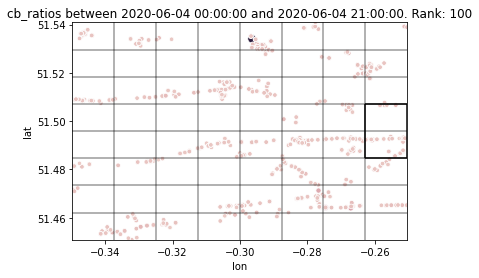

In [28]:
plot_region_by_rank(100, sig_df, forecast_df, plot_type='cb_ratio', add_legend=False)